# A/B Test Analysis
A/B tests are very commonly performed by data analysts and data scientists. The goal is to understand if a difference between two versions are statistically significant. In business. A/B Testing is used to understand customer behavior with data driven approach, not intuition. Statistical analysis in AB testing is used to determine which variation performs better for a given conversion goal. Running an AB test that directly compares a variation against a current experience that lets you ask focused questions about changes to your website or app, and then collect data about the impact of that change.<br>
This modeling can be applicated to analyze and comparing ads, landing pages, welcome email, etc.

Usually there are two groups in A/B Test, which is "Control Group" and "Variation Group". In an A/B test, you take a webpage or app screen and modify it to create a second version of the same page. This change can be as simple as a single headline or button, or be a complete redesign of the page. Then, half of your traffic is shown the original version of the page (known as the control) and half are shown the modified version of the page (the variation).

![A/B](https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png)

As visitors are served either the control or variation, their engagement with each experience is measured and collected in an analytics dashboard and analyzed through a statistical engine. You can then determine whether changing the experience had a positive, negative, or no effect on visitor behavior.

![Capture](Capture.PNG)

## Objectives
This modeling will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision in order to increase the conversion rate. Conversion in this case refers to website visitors who take targeted actions by clicking on a particular link, downloading the desired program, subscribing to a bulletin list, providing personal information as a business leader, buying a product or service, etc.

## A/B Test Process
- Collect Data
- Identify Goals
- Generate Hypothesis
- Create Variations
- Run Experiment
- Analyze Results

# I. Import Libraries
To get started, let's import the libraries.

In [110]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
from statsmodels.stats import weightstats as stests
%matplotlib inline
random.seed(42)

# II. Load Data
Read data to perform A/B Testing by input data as 'data' variable.

**Content of Dataset** :
- user_id
- timestamp
- group : <br>
  separating between 'control' group and 'treatment' group <br>
- landing_page : <br>
  the object we're about to test, which is 'old_page' and 'new_page' <br>
- converted : <br>
  determinant of how these conditions affect the customer, which is : <br>
  0 : the desired conversion is not performed <br>
  1 : the desired conversion is performed
  

In [45]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# III. Descriptive Attribute
Do some quick-look about data we're about to explore by run the dimension, data type, head/tail, summary statistics, etc 
to understand the data itself

In [39]:
data.shape

(294478, 5)

In [40]:
#checking number of unique users
data['user_id'].nunique()

290584

In [41]:
#proportion of users converted
data['converted'].mean()

0.11965919355605512

In this modeling, we will use the condition where : <br>
   - the 'control' group is 'old_page' <br>
   - the 'treatment' group is 'new_page'<br>

So, we need to find the other condition that don't line up.

In [42]:
#number of times the `new_page` and `treatment` don't line up
new_1 = data[(data.group == 'control') & (data.landing_page == 'new_page')]
new_1.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [44]:
new_2 = data[(data.group == 'treatment') & (data.landing_page == 'old_page')]
new_2.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [46]:
new_1.count() + new_2.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

## Missing Value Detection
Identifying any missing values in the data before perform any analysis. It's actually depend on the purpose of the performance, but if there is any missing values, we can cleanse and prepare it by not remove it from dataframe but doing imputation. If the missing values are numerical variable, we can impute it by its median, while if the missing values are categorical variable, we can impute it by its mode.

In [47]:
data.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

## Preparing the Data
We need to adjust the data to the modeling conditions.

In [49]:
new_1 = data[(data.group == 'control') & (data.landing_page == 'old_page')]
new_2 = data[(data.group == 'treatment') & (data.landing_page == 'new_page')]

In [52]:
#concat the two required conditions
data2 = pd.concat([new_1,new_2], keys=['control','treatment'], axis = 0)
data2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1
6,847721,2017-01-17 14:01:00.090575,control,old_page,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0


In [53]:
#double check if all of the correct rows were removed - this should be 0
data2[((data2['group'] == 'treatment') == (data2['landing_page'] == 'new_page')) == False].shape[0]

0

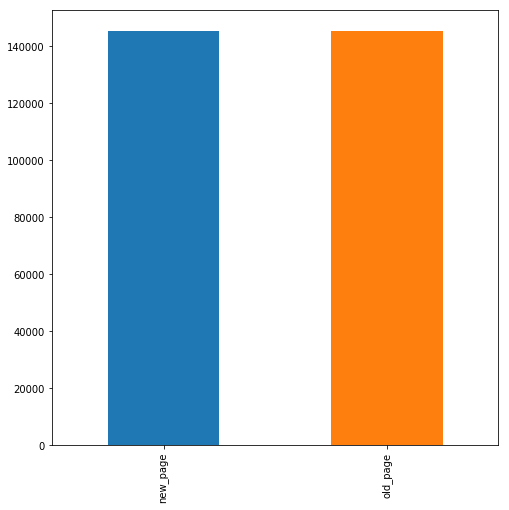

In [132]:
data2['landing_page'].value_counts().plot(kind='bar', figsize=(8,8));

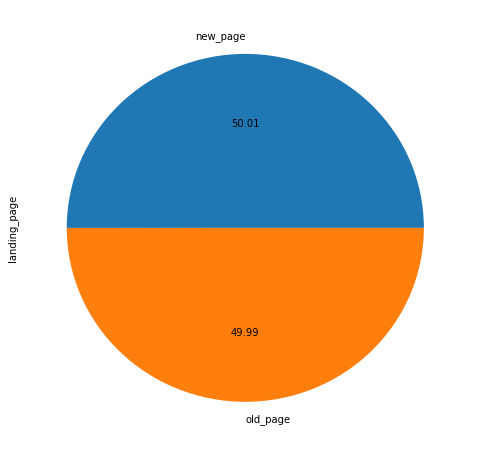

In [131]:
data2['landing_page'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8,8));

# IV. Probability of Individual Do Converting
Just to see the manual probability of user/viewer do converting in control and treatment group.

In [61]:
# Calculate the probability of an individual converting regardless of the page they receive
data2['converted'].mean()

0.11959667567149027

In [62]:
# Calculate the probabilty the individual was in the control group to convert
data2[data2['group'] == 'control']['converted'].mean()

0.1203863045004612

In [63]:
# Calculate the probabilty the individual was in the treatment group to convert
data2[data2['group'] == 'treatment']['converted'].mean()

0.11880724790277405

In [66]:
# Calculate the probabilty that an individual received the new page
p_n = data2.query('landing_page == "new_page"').user_id.nunique()/data2.user_id.nunique()
#The probability that an individual received the new page is 50.00%
p_n

0.5000619442226688

## Probability Result
While comparing treatment and control, it turns out that control scored higher than treatment. It seems to be that there is insufficient evidence to say that the new treatment page leads to more conversions than the control page. The difference of probability between control that is 12.04% and treatment groups that is 11.88% is tiny, especially when we compare them with the probability of individual conversion that is 11.96%. It is hard to tell that one page leads to more conversion because the probability that the individual received the page is 50%.

# V. A/B Testing
Now, we will run a hypothesis test continuously as each observation was observed with the time stamp associated with each event. <br>
We will consider making the decision only based on all the data provided. Further, assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. The null and alternative hypotheses follow below:

**Hypothesis**
* $H_{0}$: $P_{new}$-$P_{old}$ $<=$ $0$
* $H_{1}$: $P_{old}$ - $P_{new}$ $>$ $0$

Assume under the null hypothesis, $P_{new}$ and $P_{old}$ both have "true" success rates equal to the converted success rate regardless of page - that is $P_{new}$ and $P_{old}$ are equal. Furthermore, assume they are equal to the converted rate in data regardless of the page. 

In [72]:
#convert rate for $P_{new}$ under the null
Pnew = data2.converted.mean()
Pnew

0.11959667567149027

In [73]:
#convert rate for $P_{old}$ under the null
Pold = data2.converted.mean()
Pold

0.11959667567149027

Since Pnew and Pold both have "true" success rates equally, their converted rate will have the same result.

In [75]:
#count the total unique users with new page
n_new = data2.query('landing_page == "new_page" ').count()[0]
n_new

145311

In [76]:
#count the total unique users with old page
n_old = data2.query('landing_page == "old_page" ').count()[0]
n_old

145274

In [78]:
#simulate n_new transactions with a convertion rate of  Pnew under the null. 
#store these n_new 1's and 0's in new_page_converted
new_page_converted = np.random.choice([0,1],n_new, p=(Pnew,1-Pnew))
new_page_converted

array([0, 0, 1, ..., 1, 1, 1])

In [79]:
#simulate n_new transactions with a convert rate of  Pold under the null. 
#store these  n_new 1's and 0's in old_page_converted
old_page_converted = np.random.choice([0,1],n_old, p=(Pold,1-Pold))
old_page_converted

array([1, 0, 1, ..., 1, 1, 1])

In [80]:
#find the difference between Pnew and Pold
#find out the mean of new_page_converted
new_page_converted.mean()

0.880112310836757

In [81]:
#find out the mean of old_page_converted
old_page_converted.mean()

0.8813276980051489

In [85]:
#diff_conv is the difference between p_new and p_old.
diff_conv = new_page_converted.mean() - old_page_converted.mean()
diff_conv

-0.00023000112036383746

In [93]:
#simulate 10,000 Pnew - Pold values with random binomial
new_converted_simulation = np.random.binomial(n_new, Pnew,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, Pold,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs = np.array(p_diffs)

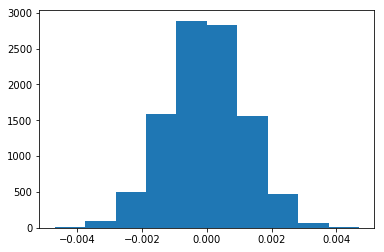

In [94]:
plt.hist(p_diffs);

In [89]:
#calculate actual difference observed
new_convert = data2.query('converted == 1 and landing_page == "new_page"').count()[0]/n_new
old_convert = data2.query('converted == 1 and landing_page == "old_page"').count()[0]/n_old
obs_diff = new_convert - old_convert
obs_diff

-0.0015790565976871451

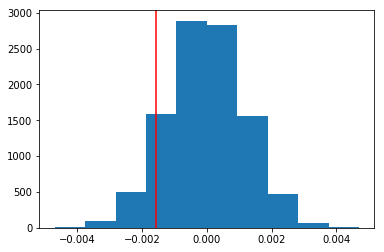

In [95]:
#plot proportion of the p_diffs are greater than the actual difference observed 
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

In [97]:
#proportion of the p_diffs are greater than the actual difference observed 
(p_diffs > obs_diff).mean()

0.906

In [99]:
(p_diffs < obs_diff).mean()

0.094

Sampling distribution analysis:

1. The proportion of the conversion rate differences were greater than the actual observed difference. The p-value is extremely large (90%) than the type I error rate (5%).That means we fail to reject the null hypothesis.

2. According to Wikipedia, p-value is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary (such as the sample mean difference between two compared groups) would be the same as or of greater magnitude than the actual observed results.

3. When the p-value is low (in this project less than 5%), it suggests that the null hypothesis is not true, and we need to consider the alternative hypothesis. Finally, the p-value of 90% indicates that the actual page should be maintained.

Now, we will use stats.proportions_ztest to compute statistic test and p-value for evaluating if there is a statistically significance difference in conversion rates of the new page and the conversion rates of the old page.<br>
First, we will calculate the number of conversions for each page, as well as the number of individuals who received each page. The n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [107]:
convert_old = df2.query('converted == 1 and landing_page == "old_page"').count()[0]
convert_new = df2.query('converted == 1 and landing_page == "new_page"').count()[0]
n_old = df2.query('landing_page == "old_page" ').count()[0]
n_new = df2.query('landing_page == "new_page" ').count()[0]

In [102]:
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

In [103]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),\
                                              np.array([n_new,n_old]), alternative = 'larger')

In [104]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [108]:
norm.cdf(z_score)

0.09494168724097551

In [109]:
norm.ppf(1-(0.05/2))

1.959963984540054

In [126]:
def Z_test(convert_new,convert_old):
    z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),\
                                              np.array([n_new,n_old]), alternative = 'larger')
    ztable=norm.ppf(1-(0.05/2))
    Decision1='Reject Null Hypothesis'
    Decision2='Accept Null Hypothesis'
    Decision= Decision1 if p_value<0.05 else Decision2
    
    table=pd.DataFrame()
    table['Z_Score']=[z_score]
    table['P-Value']=[p_value]
    table['Z-Table']=[ztable]
    table['Decision']=[Decision]
    return table


In [127]:
Z_test(convert_new,convert_old)

,Z_Score,P-Value,Z-Table,Decision
0,-1.310924,0.905058,1.959964,Accept Null Hypothesis


# VI. Conclusion

**Z-test analysis** <br>

In this modeling, the p-value associated with a 95% confidence level is 0.05. <br>
From the A/B Testing result above,  if z-score is between -1.96 and +1.96, p-value will be larger than 0.05, and we cannot reject the null hypothsis; the pattern exhibited is a pattern that could very likely be one version of a random pattern.<br>
In this case z-score is equal to 1.3109, which falls within -1.96 and 1.96. Therefore, we fail to reject the null. The p-value associated with a 95% confidence level is 0.05. If z-score is between -1.96 and +1.96, p-value will be larger than 0.05, and we cannot reject the null hypothsis; the pattern exhibited is a pattern that could very likely be one version of a random pattern. In this case z-score is equal to 1.3109, which falls within -1.96 and 1.96. <br>
Therefore, **we fail to reject the null or accept the null hypothesis**. 
